In [1]:
%load_ext autoreload
%autoreload 2

from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2


from spektral.datasets import delaunay
from spektral.layers import GraphAttention, GlobalAttentionPool
from spektral.utils import localpooling_filter

import numpy as np

import load_data as ld
import utilities
from evaluator import Evaluator
from embedder import Embedder
from embedder import Transformer
from embedder import Transformer_GNN
from embedder import Transformer_GNN_embedder

import tmp_generator as tmp

from visualizator import Visualizator


from sklearn.decomposition import TruncatedSVD

Using TensorFlow backend.


In [2]:
from Graph_generator import Graph_Generator

n_graphs = 300


# 20 permutations
gg = Graph_Generator(n_graphs=n_graphs,
                     degree = 4)
g1, na1, ea1 = gg.generate(20,10,10,1)
g2, na2, ea2 = gg.generate(20,10,10,10)

graphs, labels = gg.generate_set(g1,g2,na1, ea1,na2, ea2,15,15,plot=False)



functions = [utilities.degree,utilities.clust_coefficient,utilities.local_degree_profile]
graphs = utilities.add_info_to_nodes(graphs,functions)


max_n_nodes, n_attributes = utilities.find_shapes(graphs)
n_classes = len(np.unique(labels))

print("done")

done


In [8]:
dim = [2]
times = 2

my_GNN_big = tmp.gen_gnn_dense(max_n_nodes,
                                 n_attributes,
                                 batch_size = 32,
                                 validation_split = 0.2,
                                 epochs = 100,
                                 dim = dim,
                                 plot = True)

m_1 = Transformer(my_GNN_big)
emb_1 = Embedder([m_1],"Spektral + dense")


my_GNN = tmp.generate_GNN(max_n_nodes,
                      n_attributes,
                      n_classes,
                      batch_size = 32,
                      validation_split = 0.2,
                      epochs = 100,
                      verbose=0, 
                      plot=True)

m_2 = Transformer(my_GNN)
m_3 = Transformer(TruncatedSVD())
emb_2 = Embedder([m_2,m_3],"Spektral + PCA")

print("done") 

done


	 iteration n: 1
	 	 dim:  2
	 	 	  Spektral + dense
reset state TRANSFORMER
reset state GNN embed


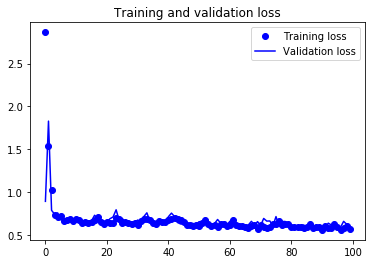

max loss 2.8650633494059243
min loss 0.5613989418461209
0
	 iteration n: 2
	 	 dim:  2
	 	 	  Spektral + dense
reset state TRANSFORMER
reset state GNN embed


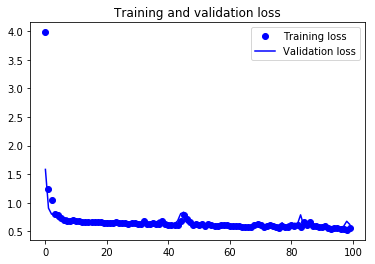

max loss 3.9798061280023482
min loss 0.525567889213562
0


In [11]:
emb = [emb_1,emb_2]
vis_500 = utilities.repeat_n_times(graphs, labels, emb, dim, times,test_size=0.3,seed = 11)

In [10]:
vis_500.summary(std = False)
vis_500.summary()

                      2    mean
----------------  -----  ------
Spektral + dense  0.667   0.667
Spektral + PCA    0.435   0.435
                      2    STD    mean
----------------  -----  -----  ------
Spektral + dense  0.667  0.142   0.404
Spektral + PCA    0.435  0.146   0.29


# GENERATE GNN DENSE